In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE=720
BATCH_SIZE=16     
CHANNELS =3       
EPOCHS=100        
data=tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/project lung cancer/dataset",
    shuffle=True,                 
    image_size=(IMAGE_SIZE,IMAGE_SIZE),   
    batch_size=BATCH_SIZE                     
)

Found 681 files belonging to 2 classes.


In [ ]:
len(data)

43

In [ ]:
train_size = 0.8   
len(data)*train_size    
train_ds=data.take(34)     
test_ds=data.skip(34)       
val_size=0.1               
len(data)*val_size        
val_ds=test_ds.take(4)     
len(val_ds)
test_ds=test_ds.skip(4)    

In [ ]:
def get__dataset_partitions_tf(ds,train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000) :
    ds_size= len(ds)
    if shuffle :
        ds=ds.shuffle(shuffle_size,seed=12)
    train_size=int(train_split * ds_size)
    val_size=int(val_split*ds_size)
    train_ds=ds.take(train_size)
    val_ds=ds.skip(train_size).take(val_size)
    test_ds=ds.skip(train_size).skip(val_size)
    return train_ds, val_ds, test_ds

In [ ]:
train_ds, val_ds, test_ds = get__dataset_partitions_tf(data)
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds =test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [ ]:

resize_and_rescale=tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

In [ ]:
data_augmentation=tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)
    
])

In [ ]:

input_shape = (BATCH_SIZE,IMAGE_SIZE, IMAGE_SIZE ,CHANNELS )
n_classes=2
model=models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, (3,3), activation='relu', input_shape = input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size= (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64, (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,  (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
     layers.Conv2D(64,  (3,3),activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation='relu'),
    layers.Dense(n_classes,activation='softmax'),
    
])
model.build(input_shape=input_shape)

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (16, 720, 720, 3)         0         
                                                                 
 sequential_1 (Sequential)   (16, 720, 720, 3)         0         
                                                                 
 conv2d (Conv2D)             (16, 718, 718, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (16, 359, 359, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (16, 357, 357, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (16, 178, 178, 64)       0         
 2D)                                                  

In [ ]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [ ]:
history1 = model.fit(
    train_ds,
    epochs=20,
    batch_size=BATCH_SIZE,
    verbose=1,
    validation_data=val_ds
)

Epoch 1/20
34/34 [==============================] - 583s 15s/step - loss: 0.4599 - accuracy: 0.8101 - val_loss: 0.1595 - val_accuracy: 0.9219
Epoch 2/20
34/34 [==============================] - 496s 15s/step - loss: 0.1762 - accuracy: 0.9255 - val_loss: 0.0992 - val_accuracy: 0.9531
Epoch 3/20
34/34 [==============================] - 491s 14s/step - loss: 0.1204 - accuracy: 0.9441 - val_loss: 0.0853 - val_accuracy: 0.9531
Epoch 4/20
34/34 [==============================] - 491s 14s/step - loss: 0.1445 - accuracy: 0.9553 - val_loss: 0.0919 - val_accuracy: 0.9531
Epoch 5/20
34/34 [==============================] - 492s 15s/step - loss: 0.1079 - accuracy: 0.9553 - val_loss: 0.1030 - val_accuracy: 0.9062
Epoch 6/20
34/34 [==============================] - 490s 14s/step - loss: 0.1856 - accuracy: 0.9274 - val_loss: 0.1495 - val_accuracy: 0.9375
Epoch 7/20
34/34 [==============================] - 489s 14s/step - loss: 0.1085 - accuracy: 0.9497 - val_loss: 0.0858 - val_accuracy: 0.9375
Epoch 

In [ ]:
model_version=1
model.save(f"../model/{model_version}")

Text(0.5, 0, 'Epoch')

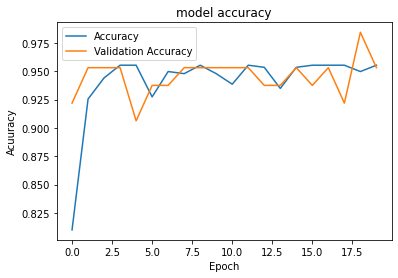

In [ ]:
import scipy.ndimage
import matplotlib.pyplot as plt
from skimage import measure, morphology, segmentation
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import scipy.ndimage as ndimage

# print accuracy graph
plt.plot(history1.history["accuracy"])
plt.plot(history1.history['val_accuracy'])
plt.title("model accuracy")
plt.legend(["Accuracy","Validation Accuracy"])
plt.ylabel("Acuuracy")
plt.xlabel("Epoch")

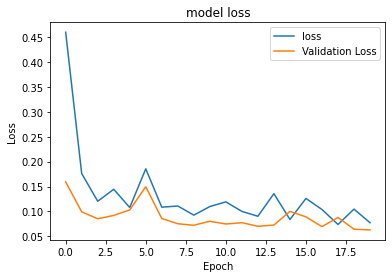

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title("model loss")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend(["loss","Validation Loss"])

first image to predict
first image's actual label: positive
predicted label:  positive


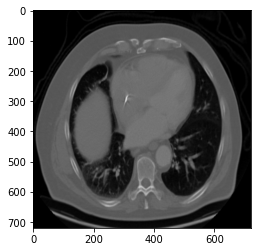

In [ ]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):
    first_image=images_batch[0].numpy().astype('uint8')
    first_label=labels_batch[0]
    print("first image to predict")
    plt.imshow(first_image)
    print("first image's actual label:",class_names[first_label])
    batch_prediction=model.predict(images_batch)
    print("predicted label: ",class_names[np.argmax(batch_prediction[0])])